In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df.info()
print("==================================")
df["region"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [71]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Visualization

Text(0.5, 1.0, 'Charges')

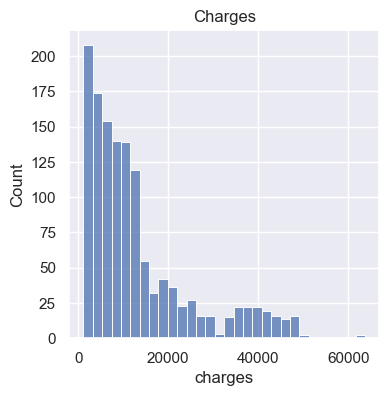

In [72]:
plt.figure(figsize=(4,4))
sns.histplot(df["charges"])
plt.title("Charges")

Text(0.5, 1.0, 'bmi and smoking charges')

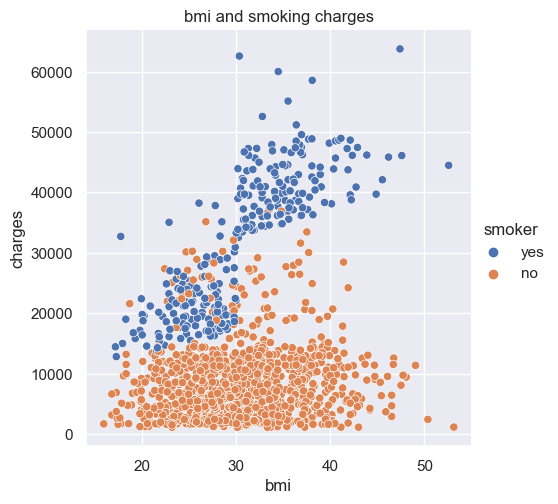

In [73]:
sns.set(rc={'figure.figsize':(9,6)})
sns.relplot(data=df, x="bmi", y="charges",hue="smoker")
plt.title("bmi and smoking charges")

Text(0.5, 1.0, 'age and smoking charges')

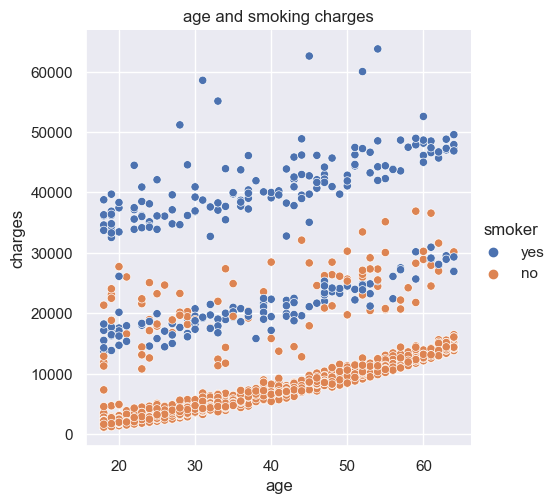

In [74]:
sns.relplot(data=df, x="age", y="charges",hue="smoker")
plt.title("age and smoking charges")

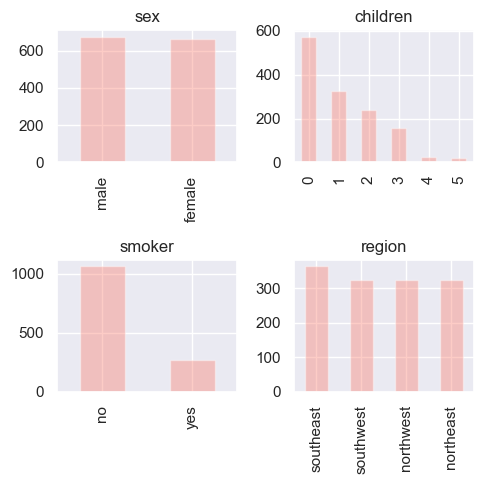

In [75]:
c = ["sex","children","smoker","region"]

fig = plt.figure(figsize=(5,5))
for i in range(len(c)):
    plt.subplot(2,2,i+1)
    df[c[i]].value_counts().plot(kind="bar",facecolor='salmon', alpha=0.4)
    plt.title(c[i])

plt.tight_layout()
plt.show()

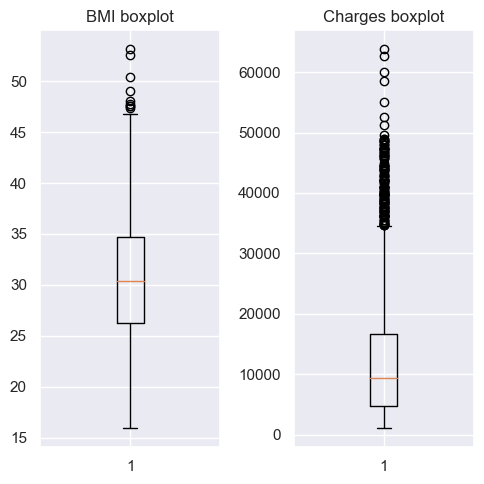

In [76]:
# checking outliers
sns.set_theme()
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.boxplot(df["bmi"])
plt.grid(visible=True,axis="y")
plt.title("BMI boxplot")

plt.subplot(1,2,2)
plt.boxplot(df["charges"])
plt.grid(visible=True,axis="y")
plt.title("Charges boxplot")

plt.tight_layout()
plt.show()

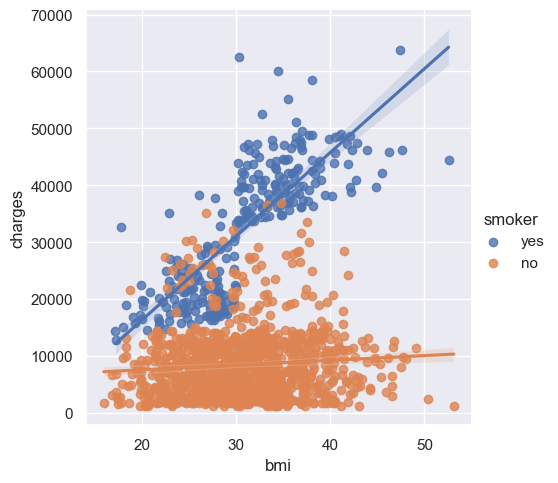

In [77]:
sns.lmplot(data=df, x="bmi", y="charges",hue="smoker")

# Preprocessing

In [78]:
# encoding the features
df2 = pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)
cols = list(df.columns)

# checking if there are null values
for col in cols :
    df[col].isnull()
    df[col].isin([" "])

In [79]:
# removing outliers
outliers_bmi = df2[df2.loc[:,"bmi"]>50]["bmi"].values.tolist()
outliers_charges = df2[df2.loc[:,"charges"]>60000]["charges"].values.tolist()

df2["bmi"] = df2["bmi"].replace(outliers_bmi,None)
df2["charges"] = df2["charges"].replace(outliers_charges,None)
df2 = df2.dropna()

In [80]:
df2["charges"] = df2["charges"].astype(float)
df2["bmi"] = df2["bmi"].astype(float)

In [81]:
X = df2.drop("charges",axis=1)
y = df2["charges"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(999, 8)
(333, 8)


In [83]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
# X_train

X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
# X_test

In [86]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,15,20,25]
lasso = Lasso()

best_lasso = GridSearchCV(lasso,{"alpha":alpha},scoring="r2")
best_lasso.fit(X_train,y_train)
print("best alpha for lasso : ",best_lasso.best_params_)

pred1 = best_lasso.predict(X_test)

lasso_r2 = r2_score(y_test,pred1)
lasso_rmse = np.sqrt(mean_squared_error(y_test,pred1))
print("lasso r2_score : ",lasso_r2)
print("lasso rmse : ",lasso_rmse)
print("=======================================")

ridge = Ridge()

best_ridge = GridSearchCV(ridge,{"alpha":alpha},scoring="r2")
best_ridge.fit(X_train,y_train)
print("best alpha for ridge : ",best_ridge.best_params_)

pred2 = best_ridge.predict(X_test)

ridge_r2 = r2_score(y_test,pred2)
ridge_rmse = np.sqrt(mean_squared_error(y_test,pred2))
print("ridge r2_score : ",ridge_r2)
print("ridge rmse : ",ridge_rmse)
print("=======================================")

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train,y_train)

pred3 = gb_regressor.predict(X_test)

gb_regressor_r2 = r2_score(y_test,pred3)
gb_regressor_rmse = np.sqrt(mean_squared_error(y_test,pred3))
print("GradientBoostingRegressor r2_score : ",gb_regressor_r2)
print("GradientBoostingRegressor rmse : ",gb_regressor_rmse)
print("=======================================")

knn = KNeighborsRegressor(weights="distance",algorithm="brute")
knn.fit(X_train,y_train)

pred4 = knn.predict(X_test)

knn_r2 = r2_score(y_test,pred4)
knn_rmse = np.sqrt(mean_squared_error(y_test,pred4))

print("knn r2_score : ",knn_r2)
print("knn rmse : ",knn_rmse)

best alpha for lasso :  {'alpha': 1}
lasso r2_score :  0.7556395214785895
lasso rmse :  5952.105988389368
best alpha for ridge :  {'alpha': 1}
ridge r2_score :  0.7556143114031626
ridge rmse :  5952.413012610044
GradientBoostingRegressor r2_score :  0.8497321481497659
GradientBoostingRegressor rmse :  4667.541753027775
knn r2_score :  0.8131188854340453
knn rmse :  5205.205504327575


# Parameters Tuning

In [87]:
loss = ["squared_error","absolute_error","huber"]
n_estimators = [25,50,75,100,115,130,150]
criterion = ["friedman_mse","squared_error"]
learning_rate = [0.05,0.07,0.1,0.2,0.3,0.4,0.5]

params = {"loss":loss,"n_estimators":n_estimators,"criterion":criterion,"learning_rate":learning_rate}

booster_gridsearch = GridSearchCV(GradientBoostingRegressor(),params,cv=5,scoring="r2")
booster_gridsearch.fit(X_train,y_train)

print("best parameters : ",booster_gridsearch.best_params_)
pred5 = booster_gridsearch.predict(X_test)

booster_gridsearch_r2 = r2_score(y_test,pred5)
booster_gridsearch_rmse = np.sqrt(mean_squared_error(y_test,pred5))

print("GradientBoostingRegressor (tuning) r2_score: ",booster_gridsearch_r2)
print("GradientBoostingRegressor (tuning) rmse : ",booster_gridsearch_rmse)

best parameters :  {'criterion': 'squared_error', 'learning_rate': 0.07, 'loss': 'squared_error', 'n_estimators': 75}
GradientBoostingRegressor (tuning) r2_score:  0.8534305833448085
GradientBoostingRegressor (tuning) rmse :  4609.744472751242


In [88]:
# maaking the code re-usable for other data
models = [best_lasso,best_ridge,gb_regressor,knn,booster_gridsearch]
r2_scores = [lasso_r2,ridge_r2,gb_regressor_r2,knn_r2,booster_gridsearch_r2]

max_score = r2_scores[0]
final_model = models[0]

for i in range(len(r2_scores)) :
    if r2_scores[i] > max_score :
        max_score = r2_scores[i]
        final_model = models[i]

print("final model is : ",final_model)
print("r2 score : ",max_score)

final model is :  GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [25, 50, 75, 100, 115, 130, 150]},
             scoring='r2')
r2 score :  0.8534305833448085
